Needleman-Wunsch (NW) algorithm on the CPU and measuring the execution time



In [ ]:
import numpy as np
import time

# Scoring scheme
match_score = 1
mismatch_penalty = -1
gap_penalty = -2

def needleman_wunsch(seq1, seq2):
    n = len(seq1)
    m = len(seq2)

    # Initialize scoring matrix
    score_matrix = np.zeros((n + 1, m + 1), dtype=int)

    # Initialize first row and column
    for i in range(n + 1):
        score_matrix[i][0] = i * gap_penalty
    for j in range(m + 1):
        score_matrix[0][j] = j * gap_penalty

    # Fill in the scoring matrix
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_penalty)
            delete = score_matrix[i - 1][j] + gap_penalty
            insert = score_matrix[i][j - 1] + gap_penalty
            score_matrix[i][j] = max(match, delete, insert)

    return score_matrix[n][m]

# Example sequences (you can replace with real DNA/protein later)
seq1 = "GATTACA"
seq2 = "GCATGCU"

# Timing the CPU version
start = time.time()
score = needleman_wunsch(seq1, seq2)
end = time.time()

print(f"Alignment score: {score}")
print(f"Execution time (CPU): {end - start:.6f} seconds")


Alignment score: -1
Execution time (CPU): 0.000287 seconds


install biopython - Input Sequences and Multiple Alignments

In [ ]:
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.2 MB/s eta 0:00:00


- use of Biopython's Entrez module to fetch real DNA sequences directly from GenBank (like BRCA1 and TP53)

In [ ]:
from Bio import Entrez, SeqIO

Entrez.email = "sai_kurra11@yahoo.com"  # Replace with your real email

def fetch_sequence(accession_id):
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq), record.id

# Get sequences
seq1, id1 = fetch_sequence("NM_007294")  # BRCA1
seq2, id2 = fetch_sequence("NM_000546")  # TP53

# Preview sequences
print(f"Loaded {id1} (Length: {len(seq1)})")
print(f"Loaded {id2} (Length: {len(seq2)})")
print("\nFirst 100 bases of BRCA1:\n", seq1[:100])
print("\nFirst 100 bases of TP53:\n", seq2[:100])



Loaded NM_007294.4 (Length: 7088)
Loaded NM_000546.6 (Length: 2512)

First 100 bases of BRCA1:
 GCTGAGACTTCCTGGACGGGGGACAGGCTGTGGGGTTTCTCAGATAACTGGGCCCCTGCGCTCAGGAGGCCTTCACCCTCTGCTCTGGGTAAAGTTCATT

First 100 bases of TP53:
 CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGCTGGGAGCGTGCTTTCCACGACGGTGACACG


 - truncated the sequences to 300 bases for faster testing, which will allow you to quickly run the Needleman-Wunsch (NW) algorithm and evaluate its performance in a more manageable timeframe

In [ ]:
# Truncate for demo speed
seq1_short = seq1[:300]
seq2_short = seq2[:300]

# Needleman-Wunsch function
import numpy as np
import time

match_score = 1
mismatch_penalty = -1
gap_penalty = -2

def needleman_wunsch(seq1, seq2):
    n = len(seq1)
    m = len(seq2)
    score_matrix = np.zeros((n + 1, m + 1), dtype=int)

    for i in range(n + 1):
        score_matrix[i][0] = i * gap_penalty
    for j in range(m + 1):
        score_matrix[0][j] = j * gap_penalty

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_penalty)
            delete = score_matrix[i - 1][j] + gap_penalty
            insert = score_matrix[i][j - 1] + gap_penalty
            score_matrix[i][j] = max(match, delete, insert)

    return score_matrix[n][m]

# Run alignment
start = time.time()
score = needleman_wunsch(seq1_short, seq2_short)
end = time.time()

print(f"\nAlignment score (first 300 bases): {score}")
print(f"Execution time (CPU): {end - start:.4f} seconds")



Alignment score (first 300 bases): -55
Execution time (CPU): 0.3397 seconds


- benchmarking the Needleman-Wunsch algorithm's performance with varying sequence lengths!
- By testing execution times with sequences of different lengths, you're able to visualize how the algorithm scales, which will be useful for performance comparison in your experiment.



Length: 100 | Score: -17 | Time: 0.0275 sec
Length: 500 | Score: -92 | Time: 0.6526 sec
Length: 1000 | Score: -168 | Time: 7.1070 sec
Length: 2000 | Score: -338 | Time: 6.6428 sec
Length: 5000 | Score: -3350 | Time: 20.0057 sec


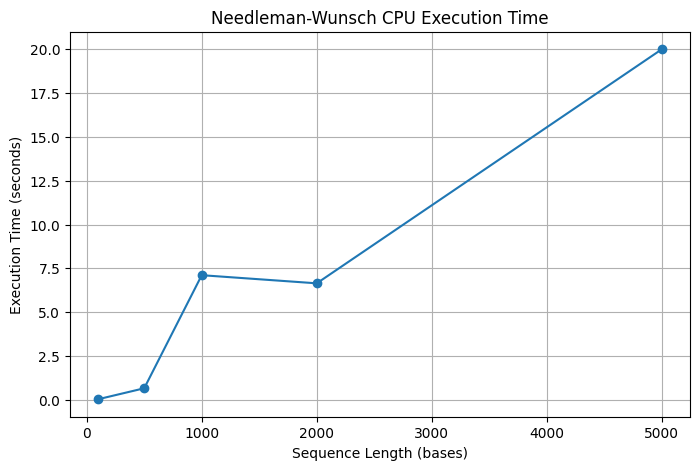

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Scoring
match_score = 1
mismatch_penalty = -1
gap_penalty = -2

# Needleman-Wunsch function
def needleman_wunsch(seq1, seq2):
    n = len(seq1)
    m = len(seq2)
    score_matrix = np.zeros((n + 1, m + 1), dtype=int)

    for i in range(n + 1):
        score_matrix[i][0] = i * gap_penalty
    for j in range(m + 1):
        score_matrix[0][j] = j * gap_penalty

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = score_matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_penalty)
            delete = score_matrix[i - 1][j] + gap_penalty
            insert = score_matrix[i][j - 1] + gap_penalty
            score_matrix[i][j] = max(match, delete, insert)

    return score_matrix[n][m]

# Test sizes
sequence_lengths = [100, 500, 1000, 2000, 5000]
execution_times = []

# Run benchmark
for length in sequence_lengths:
    s1 = seq1[:length]
    s2 = seq2[:length]

    start = time.time()
    score = needleman_wunsch(s1, s2)
    end = time.time()

    exec_time = end - start
    execution_times.append(exec_time)

    print(f"Length: {length} | Score: {score} | Time: {exec_time:.4f} sec")

# Plot results
plt.figure(figsize=(8,5))
plt.plot(sequence_lengths, execution_times, marker='o')
plt.title("Needleman-Wunsch CPU Execution Time")
plt.xlabel("Sequence Length (bases)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()


- This shows execution time increases as sequences get longer.
- Gives you a clear CPU baseline to compare with a GPU implementation later.



- plotted the execution times again with a logarithmic y-axis to get a clearer sense of the growth rate

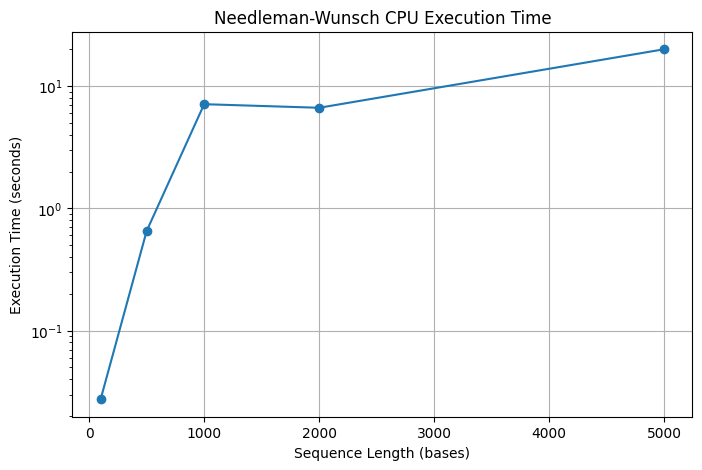

In [ ]:
# Plot results with logarithmic scale for y-axis
plt.figure(figsize=(8,5))
plt.plot(sequence_lengths, execution_times, marker='o')
plt.title("Needleman-Wunsch CPU Execution Time")
plt.xlabel("Sequence Length (bases)")
plt.ylabel("Execution Time (seconds)")
plt.yscale('log')  # Use log scale for y-axis
plt.grid(True)
plt.show()


  downloaded two sequences (BRCA1 and TP53) from GenBank and displaying their lengths

In [ ]:
# Install Biopython (if not already installed)
!pip install biopython

from Bio import Entrez, SeqIO

Entrez.email = "your_email@example.com"  # Replace with your actual email

def fetch_sequence(accession_id):
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq), record.id

# Load two real sequences
seq1, id1 = fetch_sequence("NM_007294")  # BRCA1
seq2, id2 = fetch_sequence("NM_000546")  # TP53

print(f"Loaded {id1} (Length: {len(seq1)})")
print(f"Loaded {id2} (Length: {len(seq2)})")


Loaded NM_007294.4 (Length: 7088)
Loaded NM_000546.6 (Length: 2512)


- Using CuPy for GPU Acceleration:CuPy provides a NumPy-like interface but operates on CUDA-capable GPUs
- Encoding DNA Sequences: encode_dna function that converts DNA sequences (represented by characters like 'A', 'C', 'G', 'T', etc.) into integer values for efficient computation on the GPU
- GPU-Based Needleman-Wunsch Implementation: cp.array and cp.max to perform operations on the GPU
- Timing and Benchmarking: timing the execution to compare the GPU performance with the CPU version

In [ ]:
# First change to GPU runtype

import cupy as cp
import time

# Scoring scheme
match_score = 1
mismatch_penalty = -1
gap_penalty = -2

# DNA character to integer mapping
dna_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 4, 'N': 5}

def encode_dna(seq):
    return [dna_map.get(base, 5) for base in seq]  # Unknowns = 'N' = 5

def needleman_wunsch_gpu(seq1, seq2):
    n = len(seq1)
    m = len(seq2)

    # Convert sequences to encoded integers
    s1 = cp.array(encode_dna(seq1), dtype=cp.int32)
    s2 = cp.array(encode_dna(seq2), dtype=cp.int32)

    score_matrix = cp.zeros((n + 1, m + 1), dtype=cp.int32)

    score_matrix[:, 0] = cp.arange(0, (n + 1) * gap_penalty, gap_penalty)
    score_matrix[0, :] = cp.arange(0, (m + 1) * gap_penalty, gap_penalty)

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = score_matrix[i - 1, j - 1] + (match_score if s1[i - 1] == s2[j - 1] else mismatch_penalty)
            delete = score_matrix[i - 1, j] + gap_penalty
            insert = score_matrix[i, j - 1] + gap_penalty
            score_matrix[i, j] = cp.max(cp.array([match, delete, insert]))

    return int(score_matrix[n, m].get())

# Test it on the first 1000 bases
s1 = seq1[:1000]
s2 = seq2[:1000]

start = time.time()
score_gpu = needleman_wunsch_gpu(s1, s2)
end = time.time()

print(f"\n[GPU] Alignment score: {score_gpu}")
print(f"[GPU] Execution time: {end - start:.4f} seconds")


[GPU] Alignment score: -168
[GPU] Execution time: 349.3150 seconds


In [ ]:
import cupy as cp
import time
import matplotlib.pyplot as plt

# Scoring scheme
match_score = 1
mismatch_penalty = -1
gap_penalty = -2

# DNA character to integer mapping
dna_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 4, 'N': 5}

def encode_dna(seq):
    return [dna_map.get(base, 5) for base in seq]  # Unknowns = 'N' = 5

# GPU-based Needleman-Wunsch function
def needleman_wunsch_gpu(seq1, seq2):
    n = len(seq1)
    m = len(seq2)

    # Encode the sequences to integers using the dna_map
    s1 = cp.array(encode_dna(seq1), dtype=cp.int32)
    s2 = cp.array(encode_dna(seq2), dtype=cp.int32)

    score_matrix = cp.zeros((n + 1, m + 1), dtype=cp.int32)

    score_matrix[:, 0] = cp.arange(0, (n + 1) * gap_penalty, gap_penalty)
    score_matrix[0, :] = cp.arange(0, (m + 1) * gap_penalty, gap_penalty)

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = score_matrix[i - 1, j - 1] + (match_score if s1[i - 1] == s2[j - 1] else mismatch_penalty)
            delete = score_matrix[i - 1, j] + gap_penalty
            insert = score_matrix[i, j - 1] + gap_penalty
            score_matrix[i, j] = cp.max(cp.array([match, delete, insert]))

    # Synchronize the GPU before returning result
    cp.cuda.Stream.null.synchronize()

    return int(score_matrix[n, m].get())

# Benchmarking over increasing lengths
sequence_lengths = [100, 500, 1000, 2000, 5000]
gpu_times = []

for length in sequence_lengths:
    s1 = seq1[:length]
    s2 = seq2[:length]

    start = time.time()
    score = needleman_wunsch_gpu(s1, s2)
    end = time.time()
    exec_time = end - start

    gpu_times.append(exec_time)
    print(f"[GPU] Length: {length} | Score: {score} | Time: {exec_time:.4f} sec")

# Plot GPU performance
plt.figure(figsize=(8,5))
plt.plot(sequence_lengths, gpu_times, marker='o', color='green')
plt.title("Needleman-Wunsch GPU Execution Time")
plt.xlabel("Sequence Length (bases)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.xticks(sequence_lengths)  # Optional: to mark all sequence lengths on x-axis
plt.show()


[GPU] Length: 100 | Score: -17 | Time: 3.9134 sec
[GPU] Length: 500 | Score: -92 | Time: 85.6861 sec
[GPU] Length: 1000 | Score: -168 | Time: 342.9168 sec


KeyboardInterrupt: 

Loaded NM_007294.4 (Length: 7088)
Loaded NM_000546.6 (Length: 2512)
Length:   100 | CPU Score:   -17 | CPU Time: 0.0241s | GPU Score:    -2 | GPU Time: 0.1220s
Length:   500 | CPU Score:   -92 | CPU Time: 0.8731s | GPU Score:    -2 | GPU Time: 0.2230s
Length:  1000 | CPU Score:  -168 | CPU Time: 2.7668s | GPU Score:    -2 | GPU Time: 0.2131s
Length:  2000 | CPU Score:  -338 | CPU Time: 4.2195s | GPU Score:    -2 | GPU Time: 0.4454s
Length:  5000 | CPU Score: -3350 | CPU Time: 14.9413s | GPU Score:    -1 | GPU Time: 1.0778s


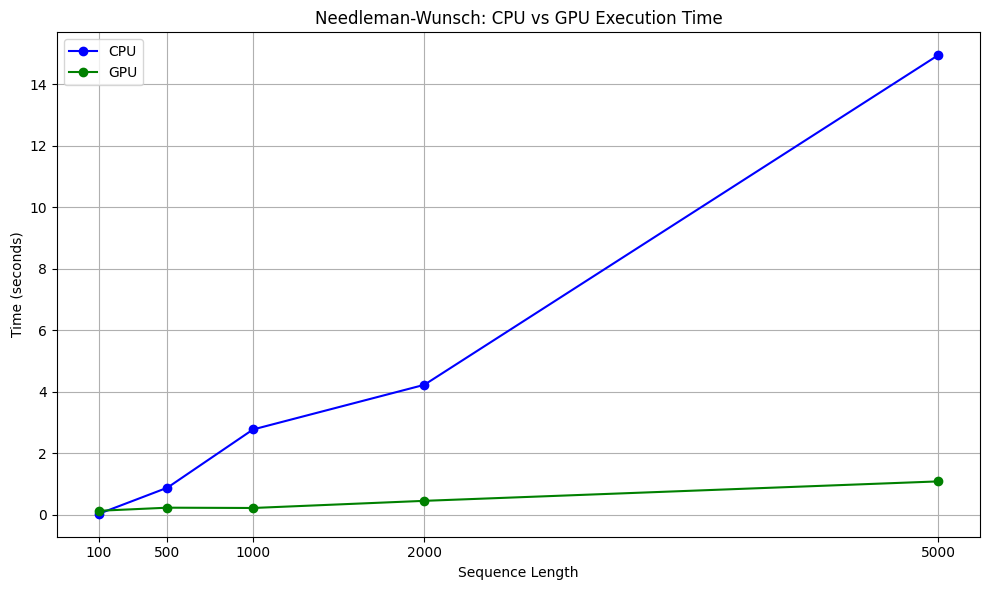

In [ ]:
# Install dependencies if needed
!pip install biopython cupy-cuda11x matplotlib --quiet

# Imports
import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from Bio import Entrez, SeqIO

# Biopython Setup
Entrez.email = "sai_kurra11@yahoo.com"

def fetch_sequence(accession_id):
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq), record.id

# Fetch real sequences
seq1, id1 = fetch_sequence("NM_007294")  # BRCA1
seq2, id2 = fetch_sequence("NM_000546")  # TP53

print(f"Loaded {id1} (Length: {len(seq1)})")
print(f"Loaded {id2} (Length: {len(seq2)})")

# Scoring scheme
match_score = 1
mismatch_penalty = -1
gap_penalty = -2

# DNA mapping
dna_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 4, 'N': 5}
def encode_dna(seq):
    return [dna_map.get(base, 5) for base in seq]

# CPU Needleman-Wunsch
def needleman_wunsch_cpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    score = np.zeros((n+1, m+1), dtype=int)
    score[:,0] = np.arange(n+1) * gap_penalty
    score[0,:] = np.arange(m+1) * gap_penalty
    for i in range(1, n+1):
        for j in range(1, m+1):
            match = score[i-1,j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = score[i-1,j] + gap_penalty
            insert = score[i,j-1] + gap_penalty
            score[i,j] = max(match, delete, insert)
    return score[n,m]

# Optimized GPU Needleman-Wunsch (partial vectorization)
def needleman_wunsch_gpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    s1 = cp.array(encode_dna(seq1), dtype=cp.int32)
    s2 = cp.array(encode_dna(seq2), dtype=cp.int32)
    score = cp.zeros((n+1, m+1), dtype=cp.int32)
    score[:, 0] = cp.arange(0, (n+1) * gap_penalty, gap_penalty)
    score[0, :] = cp.arange(0, (m+1) * gap_penalty, gap_penalty)

    for i in range(1, n+1):
        match = score[i-1, 0:m] + cp.where(s2 == s1[i-1], match_score, mismatch_penalty)
        delete = score[i-1, 1:m+1] + gap_penalty
        insert = score[i, 0:m] + gap_penalty
        score[i, 1:m+1] = cp.maximum(match, cp.maximum(delete, insert))

    cp.cuda.Stream.null.synchronize()  # Ensure all GPU ops complete
    return int(score[n, m].get())

# Benchmark setup
sequence_lengths = [100, 500, 1000, 2000, 5000]
cpu_times, gpu_times = [], []

for length in sequence_lengths:
    s1 = seq1[:length]
    s2 = seq2[:length]

    # CPU Benchmark
    t1 = time.time()
    cpu_score = needleman_wunsch_cpu(s1, s2)
    t2 = time.time()
    cpu_elapsed = t2 - t1
    cpu_times.append(cpu_elapsed)

    # GPU Benchmark
    try:
        t1 = time.time()
        gpu_score = needleman_wunsch_gpu(s1, s2)
        t2 = time.time()
        gpu_elapsed = t2 - t1
    except cp.cuda.memory.OutOfMemoryError:
        gpu_score = None
        gpu_elapsed = None
        print(f"[GPU] Skipped length {length} (OOM)")

    gpu_times.append(gpu_elapsed)

    print(f"Length: {length:5d} | CPU Score: {cpu_score:5d} | CPU Time: {cpu_elapsed:.4f}s | "
          f"GPU Score: {gpu_score if gpu_score is not None else 'OOM':>5} | GPU Time: {gpu_elapsed:.4f}s"
          if gpu_elapsed is not None else f"Length: {length:5d} | CPU Score: {cpu_score:5d} | CPU Time: {cpu_elapsed:.4f}s | GPU: Skipped (OOM)")

# Plotting results
plt.figure(figsize=(10,6))
plt.plot(sequence_lengths, cpu_times, 'o-', label="CPU", color="blue")
plt.plot(sequence_lengths, gpu_times, 'o-', label="GPU", color="green")
plt.title("Needleman-Wunsch: CPU vs GPU Execution Time")
plt.xlabel("Sequence Length")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.xticks(sequence_lengths)
plt.tight_layout()
plt.show()


Loaded NM_007294.4 (Length: 7088)
Loaded NM_000546.6 (Length: 2512)


<ipython-input-15-892b89113eba>:68: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(max_score.get())


Length:   100 | CPU Score:    50 | CPU Time: 0.0128s | GPU Score:    42 | GPU Time: 0.3152s
Length:   500 | CPU Score:   187 | CPU Time: 0.3276s | GPU Score:   143 | GPU Time: 0.1658s
Length:  1000 | CPU Score:   404 | CPU Time: 1.3472s | GPU Score:   307 | GPU Time: 0.2951s
Length:  2000 | CPU Score:   780 | CPU Time: 6.5057s | GPU Score:   539 | GPU Time: 0.6024s
Length:  5000 | CPU Score:  1011 | CPU Time: 18.3964s | GPU Score:   733 | GPU Time: 2.1539s


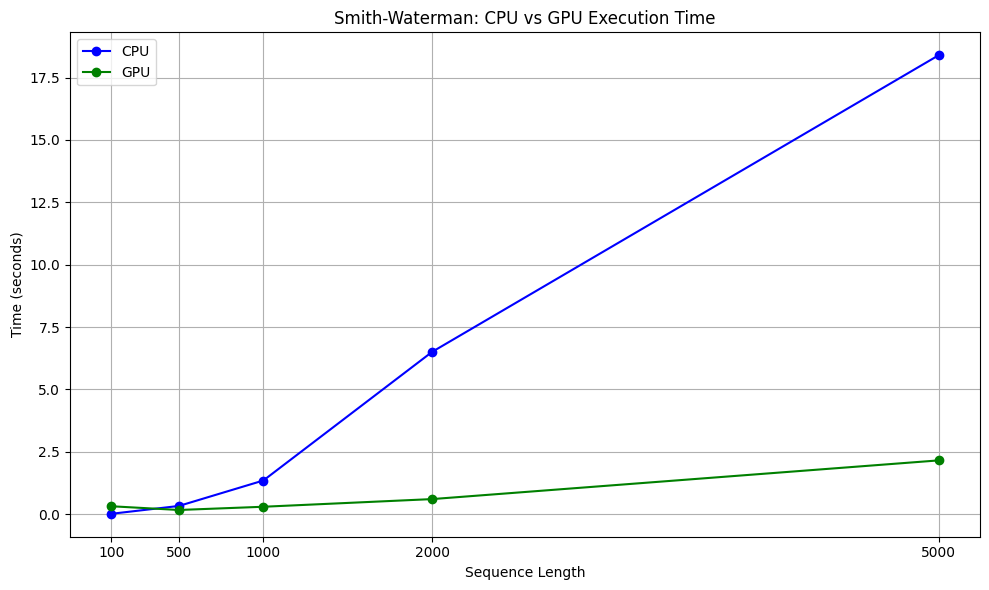

In [ ]:
# Install dependencies
!pip install biopython cupy-cuda11x matplotlib --quiet

# Imports
import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from Bio import Entrez, SeqIO

# Setup Biopython
Entrez.email = "your_email@example.com"

def fetch_sequence(accession_id):
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq), record.id

# Fetch DNA sequences
seq1, id1 = fetch_sequence("NM_007294")  # BRCA1
seq2, id2 = fetch_sequence("NM_000546")  # TP53

print(f"Loaded {id1} (Length: {len(seq1)})")
print(f"Loaded {id2} (Length: {len(seq2)})")

# Scoring scheme
match_score = 2
mismatch_penalty = -1
gap_penalty = -2

# Encoding DNA
dna_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 4, 'N': 5}
def encode_dna(seq):
    return [dna_map.get(base, 5) for base in seq]

# Smith-Waterman (CPU)
def smith_waterman_cpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    score = np.zeros((n+1, m+1), dtype=int)
    max_score = 0
    for i in range(1, n+1):
        for j in range(1, m+1):
            match = score[i-1, j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = score[i-1, j] + gap_penalty
            insert = score[i, j-1] + gap_penalty
            score[i, j] = max(0, match, delete, insert)
            max_score = max(max_score, score[i, j])
    return max_score

# Smith-Waterman (GPU with partial vectorization)
def smith_waterman_gpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    s1 = cp.array(encode_dna(seq1), dtype=cp.int32)
    s2 = cp.array(encode_dna(seq2), dtype=cp.int32)
    score = cp.zeros((n+1, m+1), dtype=cp.int32)
    max_score = cp.array([0], dtype=cp.int32)

    for i in range(1, n+1):
        match = score[i-1, 0:m] + cp.where(s2 == s1[i-1], match_score, mismatch_penalty)
        delete = score[i-1, 1:m+1] + gap_penalty
        insert = score[i, 0:m] + gap_penalty
        current = cp.maximum(0, cp.maximum(match, cp.maximum(delete, insert)))
        score[i, 1:m+1] = current
        max_score = cp.maximum(max_score, cp.max(current))

    cp.cuda.Stream.null.synchronize()
    return int(max_score.get())

# Benchmarking
sequence_lengths = [100, 500, 1000, 2000, 5000]
cpu_times, gpu_times = [], []

for length in sequence_lengths:
    s1 = seq1[:length]
    s2 = seq2[:length]

    # CPU benchmark
    t1 = time.time()
    cpu_score = smith_waterman_cpu(s1, s2)
    t2 = time.time()
    cpu_elapsed = t2 - t1
    cpu_times.append(cpu_elapsed)

    # GPU benchmark
    try:
        t1 = time.time()
        gpu_score = smith_waterman_gpu(s1, s2)
        t2 = time.time()
        gpu_elapsed = t2 - t1
    except cp.cuda.memory.OutOfMemoryError:
        gpu_score = None
        gpu_elapsed = None
        print(f"[GPU] Skipped length {length} (OOM)")

    gpu_times.append(gpu_elapsed)

    print(f"Length: {length:5d} | CPU Score: {cpu_score:5d} | CPU Time: {cpu_elapsed:.4f}s | "
          f"GPU Score: {gpu_score if gpu_score is not None else 'OOM':>5} | GPU Time: {gpu_elapsed:.4f}s"
          if gpu_elapsed is not None else f"Length: {length:5d} | CPU Score: {cpu_score:5d} | CPU Time: {cpu_elapsed:.4f}s | GPU: Skipped (OOM)")

# Plotting
plt.figure(figsize=(10,6))
plt.plot(sequence_lengths, cpu_times, 'o-', label="CPU", color="blue")
plt.plot(sequence_lengths, gpu_times, 'o-', label="GPU", color="green")
plt.title("Smith-Waterman: CPU vs GPU Execution Time")
plt.xlabel("Sequence Length")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.xticks(sequence_lengths)
plt.tight_layout()
plt.show()


Loaded NM_007294.4 (Length: 7088)
Loaded NM_000546.6 (Length: 2512)
Length:   100 | CPU Score:    50 | CPU Time: 0.0128s | GPU Score:    42 | GPU Time: 0.0298s
Length:   500 | CPU Score:   187 | CPU Time: 0.3291s | GPU Score:   143 | GPU Time: 0.1550s
Length:  1000 | CPU Score:   404 | CPU Time: 1.3216s | GPU Score:   307 | GPU Time: 0.3137s
Length:  2000 | CPU Score:   780 | CPU Time: 5.4274s | GPU Score:   539 | GPU Time: 0.5858s
Length:  5000 | CPU Score:  1011 | CPU Time: 21.8597s | GPU Score:   733 | GPU Time: 1.5378s


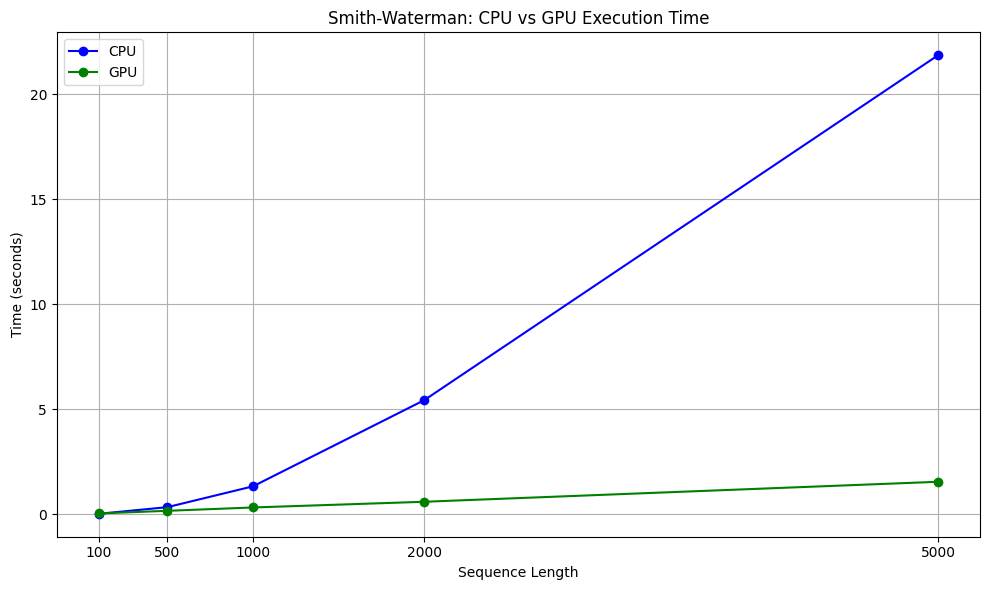

In [ ]:
# Install required packages
!pip install biopython cupy-cuda11x matplotlib --quiet

# Imports
import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from Bio import Entrez, SeqIO

# Biopython Setup
Entrez.email = "your_email@example.com"  # Replace with your actual email

def fetch_sequence(accession_id):
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq), record.id

# Fetch two DNA sequences
seq1, id1 = fetch_sequence("NM_007294")  # BRCA1
seq2, id2 = fetch_sequence("NM_000546")  # TP53

print(f"Loaded {id1} (Length: {len(seq1)})")
print(f"Loaded {id2} (Length: {len(seq2)})")

# Scoring scheme
match_score = 2
mismatch_penalty = -1
gap_penalty = -2

# DNA encoding
dna_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 4, 'N': 5}
def encode_dna(seq):
    return [dna_map.get(base, 5) for base in seq]

# Smith-Waterman CPU version
def smith_waterman_cpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    score = np.zeros((n+1, m+1), dtype=int)
    max_score = 0
    for i in range(1, n+1):
        for j in range(1, m+1):
            match = score[i-1, j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = score[i-1, j] + gap_penalty
            insert = score[i, j-1] + gap_penalty
            score[i, j] = max(0, match, delete, insert)
            max_score = max(max_score, score[i, j])
    return max_score

# Smith-Waterman GPU version (partially vectorized)
def smith_waterman_gpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    s1 = cp.array(encode_dna(seq1), dtype=cp.int32)
    s2 = cp.array(encode_dna(seq2), dtype=cp.int32)
    score = cp.zeros((n+1, m+1), dtype=cp.int32)
    max_score = cp.array([0], dtype=cp.int32)

    for i in range(1, n+1):
        match = score[i-1, 0:m] + cp.where(s2 == s1[i-1], match_score, mismatch_penalty)
        delete = score[i-1, 1:m+1] + gap_penalty
        insert = score[i, 0:m] + gap_penalty
        current = cp.maximum(0, cp.maximum(match, cp.maximum(delete, insert)))
        score[i, 1:m+1] = current
        max_score = cp.maximum(max_score, cp.max(current))

    cp.cuda.Stream.null.synchronize()
    return int(max_score.get()[0])

# Benchmarking
sequence_lengths = [100, 500, 1000, 2000, 5000]
cpu_times, gpu_times = [], []

for length in sequence_lengths:
    s1 = seq1[:length]
    s2 = seq2[:length]

    # CPU benchmark
    t1 = time.time()
    cpu_score = smith_waterman_cpu(s1, s2)
    t2 = time.time()
    cpu_elapsed = t2 - t1
    cpu_times.append(cpu_elapsed)

    # GPU benchmark
    try:
        t1 = time.time()
        gpu_score = smith_waterman_gpu(s1, s2)
        t2 = time.time()
        gpu_elapsed = t2 - t1
    except cp.cuda.memory.OutOfMemoryError:
        gpu_score = None
        gpu_elapsed = None
        print(f"[GPU] Skipped length {length} (OOM)")

    gpu_times.append(gpu_elapsed)

    print(f"Length: {length:5d} | CPU Score: {cpu_score:5d} | CPU Time: {cpu_elapsed:.4f}s | "
          f"GPU Score: {gpu_score if gpu_score is not None else 'OOM':>5} | GPU Time: {gpu_elapsed:.4f}s"
          if gpu_elapsed is not None else f"Length: {length:5d} | CPU Score: {cpu_score:5d} | CPU Time: {cpu_elapsed:.4f}s | GPU: Skipped (OOM)")

# Plot results
plt.figure(figsize=(10,6))
plt.plot(sequence_lengths, cpu_times, 'o-', label="CPU", color="blue")
plt.plot(sequence_lengths, gpu_times, 'o-', label="GPU", color="green")
plt.title("Smith-Waterman: CPU vs GPU Execution Time")
plt.xlabel("Sequence Length")
plt.ylabel("Time (seconds)")
plt.legend()
plt.grid(True)
plt.xticks(sequence_lengths)
plt.tight_layout()
plt.show()


Length: 100 | CPU Time: 0.0947s, CPU Mem: 0.05 MB | GPU Time: 0.0304s, GPU Mem: 15.32 MB
Length: 500 | CPU Time: 0.4736s, CPU Mem: 0.02 MB | GPU Time: 0.2852s, GPU Mem: 15.32 MB
Length: 1000 | CPU Time: 1.3531s, CPU Mem: 0.25 MB | GPU Time: 0.2877s, GPU Mem: 15.32 MB
Length: 2000 | CPU Time: 6.4415s, CPU Mem: 0.00 MB | GPU Time: 0.5822s, GPU Mem: 15.32 MB


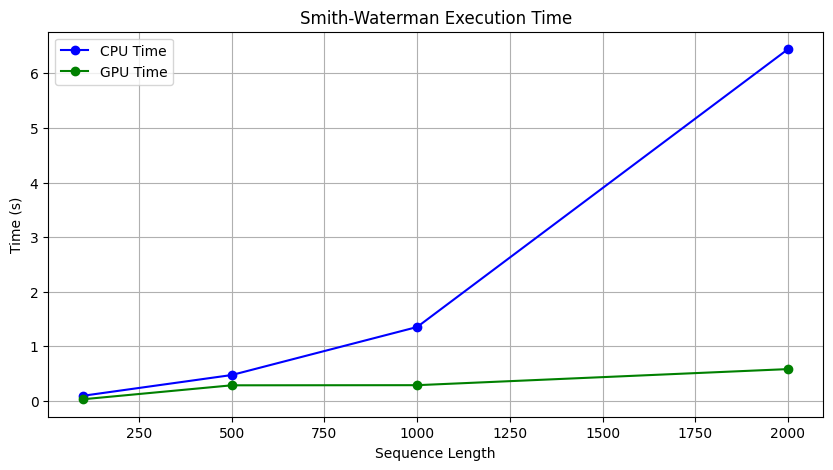

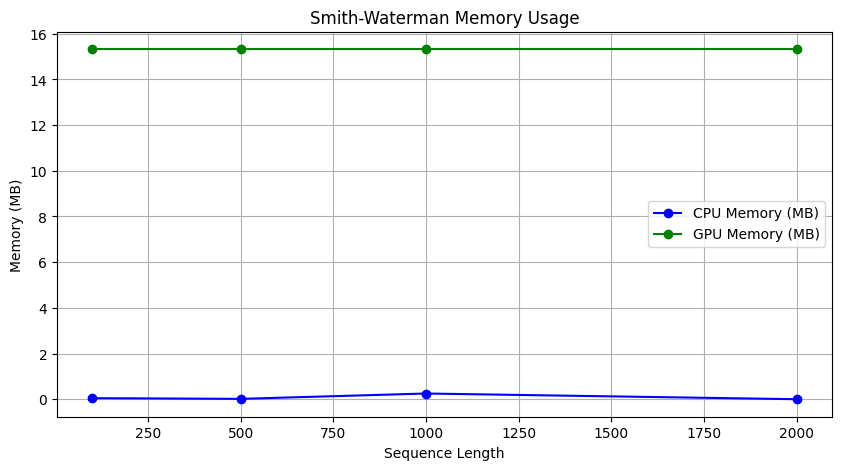

In [ ]:
# Install required packages
!pip install -q biopython cupy-cuda11x memory-profiler matplotlib

# Imports
import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from Bio import Entrez, SeqIO

# 1. Fetch sequences from NCBI
Entrez.email = "sai_kurra11@yahoo.com"  # Replace with your actual email

def fetch_sequence(accession_id):
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq)

seq1 = fetch_sequence("NM_007294")  # BRCA1
seq2 = fetch_sequence("NM_000546")  # TP53

# 2. Scoring parameters
match_score = 2
mismatch_penalty = -1
gap_penalty = -2

# DNA encoding for GPU
dna_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 4, 'N': 5}
def encode_dna(seq):
    return [dna_map.get(base, 5) for base in seq]

# 3. Smith-Waterman CPU implementation
def smith_waterman_cpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    score = np.zeros((n+1, m+1), dtype=int)
    max_score = 0
    for i in range(1, n+1):
        for j in range(1, m+1):
            match = score[i-1, j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = score[i-1, j] + gap_penalty
            insert = score[i, j-1] + gap_penalty
            score[i, j] = max(0, match, delete, insert)
            max_score = max(max_score, score[i, j])
    return max_score

# 4. Smith-Waterman GPU implementation
def smith_waterman_gpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    s1 = cp.array(encode_dna(seq1), dtype=cp.int32)
    s2 = cp.array(encode_dna(seq2), dtype=cp.int32)
    score = cp.zeros((n+1, m+1), dtype=cp.int32)
    max_score = cp.array([0], dtype=cp.int32)

    for i in range(1, n+1):
        match = score[i-1, 0:m] + cp.where(s2 == s1[i-1], match_score, mismatch_penalty)
        delete = score[i-1, 1:m+1] + gap_penalty
        insert = score[i, 0:m] + gap_penalty
        current = cp.maximum(0, cp.maximum(match, cp.maximum(delete, insert)))
        score[i, 1:m+1] = current
        max_score = cp.maximum(max_score, cp.max(current))

    cp.cuda.Stream.null.synchronize()
    return int(max_score.get()[0])  # Extract scalar

# 5. Benchmark setup
sequence_lengths = [100, 500, 1000, 2000]
cpu_times, gpu_times = [], []
cpu_memories, gpu_memories = [], []

for length in sequence_lengths:
    s1 = seq1[:length]
    s2 = seq2[:length]

    # CPU time and memory
    cpu_start = time.time()
    mem_cpu = memory_usage((smith_waterman_cpu, (s1, s2)), max_iterations=1)
    cpu_time = time.time() - cpu_start
    cpu_mem = max(mem_cpu) - min(mem_cpu)
    cpu_times.append(cpu_time)
    cpu_memories.append(cpu_mem)

    # GPU time and memory
    cp.get_default_memory_pool().free_all_blocks()
    gpu_start = time.time()
    score_gpu = smith_waterman_gpu(s1, s2)
    gpu_time = time.time() - gpu_start
    gpu_mem = cp.get_default_memory_pool().used_bytes() / (1024 * 1024)  # in MB
    gpu_times.append(gpu_time)
    gpu_memories.append(gpu_mem)

    print(f"Length: {length} | CPU Time: {cpu_time:.4f}s, CPU Mem: {cpu_mem:.2f} MB | "
          f"GPU Time: {gpu_time:.4f}s, GPU Mem: {gpu_mem:.2f} MB")

# 6. Plot execution time
plt.figure(figsize=(10,5))
plt.plot(sequence_lengths, cpu_times, 'o-', label='CPU Time', color='blue')
plt.plot(sequence_lengths, gpu_times, 'o-', label='GPU Time', color='green')
plt.title("Smith-Waterman Execution Time")
plt.xlabel("Sequence Length")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()

# 7. Plot memory usage
plt.figure(figsize=(10,5))
plt.plot(sequence_lengths, cpu_memories, 'o-', label='CPU Memory (MB)', color='blue')
plt.plot(sequence_lengths, gpu_memories, 'o-', label='GPU Memory (MB)', color='green')
plt.title("Smith-Waterman Memory Usage")
plt.xlabel("Sequence Length")
plt.ylabel("Memory (MB)")
plt.legend()
plt.grid(True)
plt.show()


Length: 100 | CPU Time: 0.0319s, CPU Mem: 0.00 MB | GPU Time: 3.2918s, GPU Mem: 19.19 MB
Length: 500 | CPU Time: 0.3803s, CPU Mem: 0.00 MB | GPU Time: 87.1288s, GPU Mem: 19.19 MB
Length: 1000 | CPU Time: 1.6616s, CPU Mem: 0.02 MB | GPU Time: 366.2014s, GPU Mem: 19.19 MB
Length: 2000 | CPU Time: 5.9618s, CPU Mem: 0.00 MB | GPU Time: 1359.8665s, GPU Mem: 19.19 MB


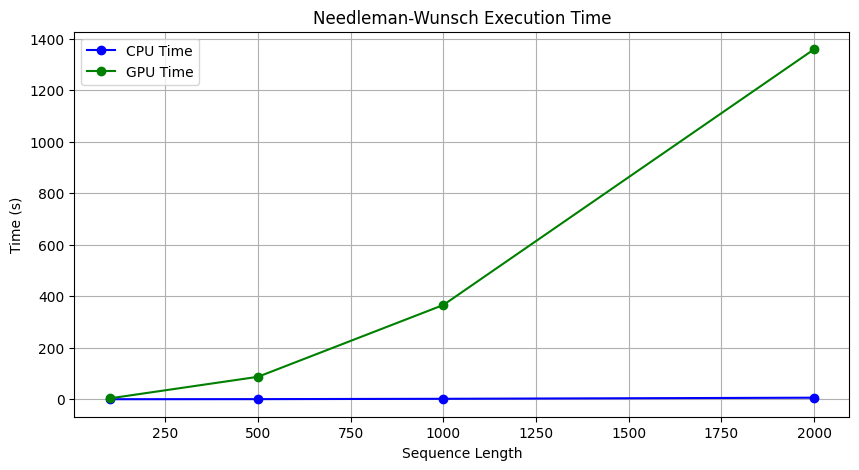

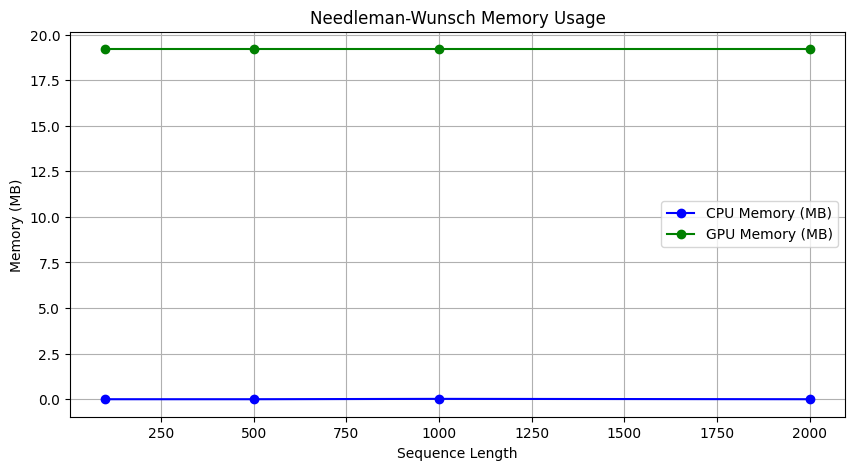

In [ ]:
# Imports
import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from Bio import Entrez, SeqIO

# 1. Fetch sequences from NCBI
Entrez.email = "sai_kurra11@yahoo.com"  # Replace with your actual email

def fetch_sequence(accession_id):
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq)

seq1 = fetch_sequence("NM_007294")  # BRCA1
seq2 = fetch_sequence("NM_000546")  # TP53

# 2. Scoring parameters
match_score = 1
mismatch_penalty = -1
gap_penalty = -2

# DNA encoding for GPU
dna_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 4, 'N': 5}
def encode_dna(seq):
    return [dna_map.get(base, 5) for base in seq]

# 3. Needleman-Wunsch CPU
def needleman_wunsch_cpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    score = np.zeros((n+1, m+1), dtype=int)
    for i in range(n+1):
        score[i][0] = i * gap_penalty
    for j in range(m+1):
        score[0][j] = j * gap_penalty
    for i in range(1, n+1):
        for j in range(1, m+1):
            match = score[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = score[i-1][j] + gap_penalty
            insert = score[i][j-1] + gap_penalty
            score[i][j] = max(match, delete, insert)
    return score[n][m]

# 4. Needleman-Wunsch GPU
def needleman_wunsch_gpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    s1 = cp.array(encode_dna(seq1), dtype=cp.int32)
    s2 = cp.array(encode_dna(seq2), dtype=cp.int32)
    score = cp.zeros((n+1, m+1), dtype=cp.int32)

    score[:, 0] = cp.arange(0, (n + 1) * gap_penalty, gap_penalty)
    score[0, :] = cp.arange(0, (m + 1) * gap_penalty, gap_penalty)

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = score[i - 1, j - 1] + (match_score if s1[i - 1] == s2[j - 1] else mismatch_penalty)
            delete = score[i - 1, j] + gap_penalty
            insert = score[i, j - 1] + gap_penalty
            score[i, j] = cp.max(cp.array([match, delete, insert]))

    cp.cuda.Stream.null.synchronize()
    return int(score[n, m].get())

# 5. Benchmarking
sequence_lengths = [100, 500, 1000, 2000]
cpu_times, gpu_times = [], []
cpu_memories, gpu_memories = [], []

for length in sequence_lengths:
    s1 = seq1[:length]
    s2 = seq2[:length]

    # CPU time and memory
    cpu_start = time.time()
    mem_cpu = memory_usage((needleman_wunsch_cpu, (s1, s2)), max_iterations=1)
    cpu_time = time.time() - cpu_start
    cpu_mem = max(mem_cpu) - min(mem_cpu)
    cpu_times.append(cpu_time)
    cpu_memories.append(cpu_mem)

    # GPU time and memory
    cp.get_default_memory_pool().free_all_blocks()
    gpu_start = time.time()
    score_gpu = needleman_wunsch_gpu(s1, s2)
    gpu_time = time.time() - gpu_start
    gpu_mem = cp.get_default_memory_pool().used_bytes() / (1024 * 1024)  # MB
    gpu_times.append(gpu_time)
    gpu_memories.append(gpu_mem)

    print(f"Length: {length} | CPU Time: {cpu_time:.4f}s, CPU Mem: {cpu_mem:.2f} MB | "
          f"GPU Time: {gpu_time:.4f}s, GPU Mem: {gpu_mem:.2f} MB")

# 6. Plot execution time
plt.figure(figsize=(10,5))
plt.plot(sequence_lengths, cpu_times, 'o-', label='CPU Time', color='blue')
plt.plot(sequence_lengths, gpu_times, 'o-', label='GPU Time', color='green')
plt.title("Needleman-Wunsch Execution Time")
plt.xlabel("Sequence Length")
plt.ylabel("Time (s)")
plt.legend()
plt.grid(True)
plt.show()

# 7. Plot memory usage
plt.figure(figsize=(10,5))
plt.plot(sequence_lengths, cpu_memories, 'o-', label='CPU Memory (MB)', color='blue')
plt.plot(sequence_lengths, gpu_memories, 'o-', label='GPU Memory (MB)', color='green')
plt.title("Needleman-Wunsch Memory Usage")
plt.xlabel("Sequence Length")
plt.ylabel("Memory (MB)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
##  combined plot comparing NW and SW across the same sequence lengths
# This comparison will include: Execution Time: 1. Time taken for alignment. 2. Memory Usage: Peak memory consumption during execution.
# Imports
import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from Bio import Entrez, SeqIO

# 1. Fetch sequences from NCBI
Entrez.email = "your_email@example.com"  # Replace with your actual email

def fetch_sequence(accession_id):
    handle = Entrez.efetch(db="nucleotide", id=accession_id, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    handle.close()
    return str(record.seq)

seq1 = fetch_sequence("NM_007294")  # BRCA1
seq2 = fetch_sequence("NM_000546")  # TP53

# 2. Scoring parameters
match_score = 2
mismatch_penalty = -1
gap_penalty = -2

# DNA encoding for GPU
dna_map = {'A': 0, 'C': 1, 'G': 2, 'T': 3, 'U': 4, 'N': 5}
def encode_dna(seq):
    return [dna_map.get(base, 5) for base in seq]

# 3. Smith-Waterman CPU
def smith_waterman_cpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    score = np.zeros((n+1, m+1), dtype=int)
    max_score = 0
    for i in range(1, n+1):
        for j in range(1, m+1):
            match = score[i-1, j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = score[i-1, j] + gap_penalty
            insert = score[i, j-1] + gap_penalty
            score[i, j] = max(0, match, delete, insert)
            max_score = max(max_score, score[i, j])
    return max_score

# 4. Smith-Waterman GPU
def smith_waterman_gpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    s1 = cp.array(encode_dna(seq1), dtype=cp.int32)
    s2 = cp.array(encode_dna(seq2), dtype=cp.int32)
    score = cp.zeros((n+1, m+1), dtype=cp.int32)
    max_score = cp.array([0], dtype=cp.int32)

    for i in range(1, n+1):
        match = score[i-1, 0:m] + cp.where(s2 == s1[i-1], match_score, mismatch_penalty)
        delete = score[i-1, 1:m+1] + gap_penalty
        insert = score[i, 0:m] + gap_penalty
        current = cp.maximum(0, cp.maximum(match, cp.maximum(delete, insert)))
        score[i, 1:m+1] = current
        max_score = cp.maximum(max_score, cp.max(current))

    cp.cuda.Stream.null.synchronize()
    return int(max_score.item())  # Fixed: Use .item() for scalar conversion

# 5. Needleman-Wunsch CPU
def needleman_wunsch_cpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    score = np.zeros((n+1, m+1), dtype=int)
    for i in range(n+1):
        score[i][0] = i * gap_penalty
    for j in range(m+1):
        score[0][j] = j * gap_penalty
    for i in range(1, n+1):
        for j in range(1, m+1):
            match = score[i-1][j-1] + (match_score if seq1[i-1] == seq2[j-1] else mismatch_penalty)
            delete = score[i-1][j] + gap_penalty
            insert = score[i][j-1] + gap_penalty
            score[i][j] = max(match, delete, insert)
    return score[n][m]

# 6. Needleman-Wunsch GPU
def needleman_wunsch_gpu(seq1, seq2):
    n, m = len(seq1), len(seq2)
    s1 = cp.array(encode_dna(seq1), dtype=cp.int32)
    s2 = cp.array(encode_dna(seq2), dtype=cp.int32)
    score = cp.zeros((n+1, m+1), dtype=cp.int32)

    score[:, 0] = cp.arange(0, (n + 1) * gap_penalty, gap_penalty)
    score[0, :] = cp.arange(0, (m + 1) * gap_penalty, gap_penalty)

    for i in range(1, n + 1):
        for j in range(1, m + 1):
            match = score[i - 1, j - 1] + (match_score if s1[i - 1] == s2[j - 1] else mismatch_penalty)
            delete = score[i - 1, j] + gap_penalty
            insert = score[i, j - 1] + gap_penalty
            score[i, j] = cp.max(cp.array([match, delete, insert]))

    cp.cuda.Stream.null.synchronize()
    return int(score[n, m].item())  # Fixed: Use .item() for scalar conversion

# 7. Benchmarking
sequence_lengths = [100, 500, 1000, 2000]
cpu_times_sw, gpu_times_sw = [], []
cpu_memories_sw, gpu_memories_sw = [], []
cpu_times_nw, gpu_times_nw = [], []
cpu_memories_nw, gpu_memories_nw = [], []

for length in sequence_lengths:
    s1 = seq1[:length]
    s2 = seq2[:length]

    # Smith-Waterman CPU
    cpu_start = time.time()
    mem_cpu_sw = memory_usage((smith_waterman_cpu, (s1, s2)), max_iterations=1)
    cpu_time_sw = time.time() - cpu_start
    cpu_mem_sw = max(mem_cpu_sw) - min(mem_cpu_sw)
    cpu_times_sw.append(cpu_time_sw)
    cpu_memories_sw.append(cpu_mem_sw)

    # Smith-Waterman GPU
    cp.get_default_memory_pool().free_all_blocks()
    gpu_start = time.time()
    score_gpu_sw = smith_waterman_gpu(s1, s2)
    gpu_time_sw = time.time() - gpu_start
    gpu_mem_sw = cp.get_default_memory_pool().used_bytes()

    gpu_times_sw.append

    # 7. Benchmarking (continued)
sequence_lengths = [100, 500, 1000, 2000]
cpu_times_sw, gpu_times_sw = [], []
cpu_memories_sw, gpu_memories_sw = [], []
cpu_times_nw, gpu_times_nw = [], []
cpu_memories_nw, gpu_memories_nw = [], []

for length in sequence_lengths:
    s1 = seq1[:length]
    s2 = seq2[:length]

    # Smith-Waterman CPU
    cpu_start = time.time()
    mem_cpu_sw = memory_usage((smith_waterman_cpu, (s1, s2)), max_iterations=1)
    cpu_time_sw = time.time() - cpu_start
    cpu_mem_sw = max(mem_cpu_sw) - min(mem_cpu_sw)
    cpu_times_sw.append(cpu_time_sw)
    cpu_memories_sw.append(cpu_mem_sw)

    # Smith-Waterman GPU
    cp.get_default_memory_pool().free_all_blocks()
    gpu_start = time.time()
    score_gpu_sw = smith_waterman_gpu(s1, s2)
    gpu_time_sw = time.time() - gpu_start
    gpu_mem_sw = cp.get_default_memory_pool().used_bytes()
    gpu_times_sw.append(gpu_time_sw)
    gpu_memories_sw.append(gpu_mem_sw)

    # Needleman-Wunsch CPU
    cpu_start = time.time()
    mem_cpu_nw = memory_usage((needleman_wunsch_cpu, (s1, s2)), max_iterations=1)
    cpu_time_nw = time.time() - cpu_start
    cpu_mem_nw = max(mem_cpu_nw) - min(mem_cpu_nw)
    cpu_times_nw.append(cpu_time_nw)
    cpu_memories_nw.append(cpu_mem_nw)

    # Needleman-Wunsch GPU
    cp.get_default_memory_pool().free_all_blocks()
    gpu_start = time.time()
    score_gpu_nw = needleman_wunsch_gpu(s1, s2)
    gpu_time_nw = time.time() - gpu_start
    gpu_mem_nw = cp.get_default_memory_pool().used_bytes()
    gpu_times_nw.append(gpu_time_nw)
    gpu_memories_nw.append(gpu_mem_nw)

# 8. Plotting combined results

# Plot Execution Time Comparison (NW vs SW on CPU vs GPU)
plt.figure(figsize=(14, 7))

# Execution Time Subplot
plt.subplot(1, 2, 1)
plt.plot(sequence_lengths, cpu_times_sw, label="Smith-Waterman CPU", marker='o', color='r')
plt.plot(sequence_lengths, gpu_times_sw, label="Smith-Waterman GPU", marker='o', color='b')
plt.plot(sequence_lengths, cpu_times_nw, label="Needleman-Wunsch CPU", marker='x', color='g')
plt.plot(sequence_lengths, gpu_times_nw, label="Needleman-Wunsch GPU", marker='x', color='y')

plt.title("Execution Time Comparison")
plt.xlabel("Sequence Length")
plt.ylabel("Execution Time (seconds)")
plt.legend(loc="upper left")
plt.grid(True)

# Plot Memory Usage Comparison (NW vs SW on CPU vs GPU)
plt.subplot(1, 2, 2)
plt.plot(sequence_lengths, cpu_memories_sw, label="Smith-Waterman CPU", marker='o', color='r')
plt.plot(sequence_lengths, gpu_memories_sw, label="Smith-Waterman GPU", marker='o', color='b')
plt.plot(sequence_lengths, cpu_memories_nw, label="Needleman-Wunsch CPU", marker='x', color='g')
plt.plot(sequence_lengths, gpu_memories_nw, label="Needleman-Wunsch GPU", marker='x', color='y')

plt.title("Memory Usage Comparison")
plt.xlabel("Sequence Length")
plt.ylabel("Memory Usage (bytes)")
plt.legend(loc="upper left")
plt.grid(True)

# Display the combined plot
plt.tight_layout()
plt.show()

KeyboardInterrupt: 